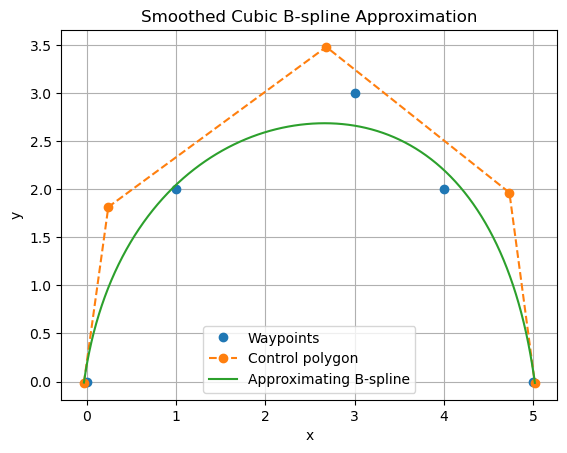

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Smoothed B-spline approximation (cubic)
# -----------------------

# Waypoints
Q = np.array([
    [0.0, 0.0],
    [1.0, 2.0],
    [3.0, 3.0],
    [4.0, 2.0],
    [5.0, 0.0]
])

M = len(Q) - 1
k = 3  # cubic degree

# Step 1: chord-length parameters in [0,1]
dist = np.linalg.norm(np.diff(Q, axis=0), axis=1)
t = np.zeros(M + 1)
t[1:] = np.cumsum(dist)
t /= t[-1]

# Step 2: fewer control points => approximation not interpolation
n = 4  # n+1 control points

# Step 3: clamped uniform knot vector on [0,1]
U = np.zeros(n + k + 2)
U[-(k+1):] = 1.0
num_interior = n - k
if num_interior > 0:
    interior = np.linspace(0, 1, num_interior + 2)[1:-1]
    U[k+1:k+1+num_interior] = interior

# Cox–de Boor basis with endpoint handling
def N(i, p, x):
    if p == 0:
        # include right endpoint so curve reaches the end
        if (U[i] <= x < U[i+1]) or (x == U[-1] and U[i] <= x <= U[i+1]):
            return 1.0
        return 0.0

    denom1 = U[i+p] - U[i]
    denom2 = U[i+p+1] - U[i+1]
    term1 = 0.0
    term2 = 0.0
    if denom1 > 1e-12:
        term1 = (x - U[i]) / denom1 * N(i, p-1, x)
    if denom2 > 1e-12:
        term2 = (U[i+p+1] - x) / denom2 * N(i+1, p-1, x)
    return term1 + term2

# Step 4: build basis matrix A
A = np.zeros((M + 1, n + 1))
for j in range(M + 1):
    for i in range(n + 1):
        A[j, i] = N(i, k, t[j])

# Step 5: smoothing penalty on 2nd differences
lam = 1e-2
D2 = np.zeros((n - 1, n + 1))
for i in range(n - 1):
    D2[i, i]     = 1.0
    D2[i, i + 1] = -2.0
    D2[i, i + 2] = 1.0

# Solve (A^T A + lam D^T D) P = A^T Q
P = np.linalg.solve(A.T @ A + lam * (D2.T @ D2), A.T @ Q)

# Evaluate spline
T = np.linspace(0, 1, 300)
curve = np.zeros((len(T), 2))
for ti, tt in enumerate(T):
    for i in range(n + 1):
        curve[ti] += N(i, k, tt) * P[i]

# Plot
plt.figure()
plt.plot(Q[:, 0], Q[:, 1], 'o', label="Waypoints")
plt.plot(P[:, 0], P[:, 1], '--o', label="Control polygon")
plt.plot(curve[:, 0], curve[:, 1], label="Approximating B-spline")
plt.title("Smoothed Cubic B-spline Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


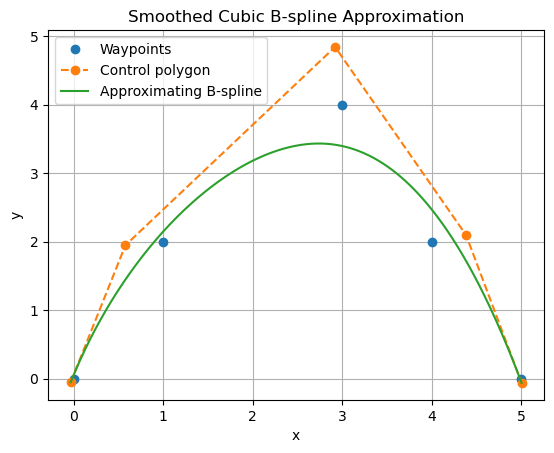

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Smoothed B-spline approximation (cubic)
# -----------------------

# Waypoints
Q = np.array([
    [0.0, 0.0],
    [1.0, 2.0],
    [3.0, 4.0],
    [4.0, 2.0],
    [5.0, 0.0]
])

M = len(Q) - 1
k = 3  # cubic degree

# Step 1: chord-length parameters in [0,1]
dist = np.linalg.norm(np.diff(Q, axis=0), axis=1)
t = np.zeros(M + 1)
t[1:] = np.cumsum(dist)
t /= t[-1]

# Step 2: fewer control points => approximation not interpolation
n = 4  # n+1 control points

# Step 3: clamped uniform knot vector on [0,1]
U = np.zeros(n + k + 2)
U[-(k+1):] = 1.0
num_interior = n - k
if num_interior > 0:
    interior = np.linspace(0, 1, num_interior + 2)[1:-1]
    U[k+1:k+1+num_interior] = interior

# Cox–de Boor basis with endpoint handling
def N(i, p, x):
    if p == 0:
        # include right endpoint so curve reaches the end
        if (U[i] <= x < U[i+1]) or (x == U[-1] and U[i] <= x <= U[i+1]):
            return 1.0
        return 0.0

    denom1 = U[i+p] - U[i]
    denom2 = U[i+p+1] - U[i+1]
    term1 = 0.0
    term2 = 0.0
    if denom1 > 1e-12:
        term1 = (x - U[i]) / denom1 * N(i, p-1, x)
    if denom2 > 1e-12:
        term2 = (U[i+p+1] - x) / denom2 * N(i+1, p-1, x)
    return term1 + term2

# Step 4: build basis matrix A
A = np.zeros((M + 1, n + 1))
for j in range(M + 1):
    for i in range(n + 1):
        A[j, i] = N(i, k, t[j])

# Step 5: smoothing penalty on 2nd differences
lam = 1e-2
D2 = np.zeros((n - 1, n + 1))
for i in range(n - 1):
    D2[i, i]     = 1.0
    D2[i, i + 1] = -2.0
    D2[i, i + 2] = 1.0

# Solve (A^T A + lam D^T D) P = A^T Q
P = np.linalg.solve(A.T @ A + lam * (D2.T @ D2), A.T @ Q)

# Evaluate spline
T = np.linspace(0, 1, 300)
curve = np.zeros((len(T), 2))
for ti, tt in enumerate(T):
    for i in range(n + 1):
        curve[ti] += N(i, k, tt) * P[i]

# Plot
plt.figure()
plt.plot(Q[:, 0], Q[:, 1], 'o', label="Waypoints")
plt.plot(P[:, 0], P[:, 1], '--o', label="Control polygon")
plt.plot(curve[:, 0], curve[:, 1], label="Approximating B-spline")
plt.title("Smoothed Cubic B-spline Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


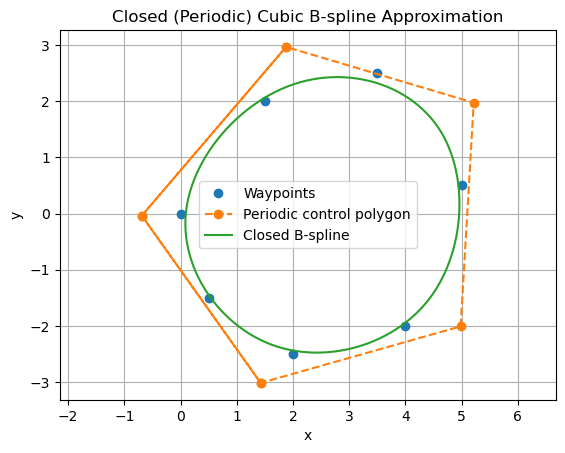

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Closed (periodic) cubic B-spline approximation
# -----------------------

# Example closed-loop waypoints (replace with yours)
Q = np.array([
    [0.0, 0.0],
    [1.5, 2.0],
    [3.5, 2.5],
    [5.0, 0.5],
    [4.0, -2.0],
    [2.0, -2.5],
    [0.5, -1.5]
])

# Ensure closed data (append first point if needed)
if np.linalg.norm(Q[0] - Q[-1]) > 1e-9:
    Q = np.vstack([Q, Q[0]])

M = len(Q) - 1  # last equals first
k = 3           # cubic

# Step 1: chord-length parameters around the loop, normalized to [0,1)
dist = np.linalg.norm(np.diff(Q, axis=0), axis=1)
s = np.zeros(M + 1)
s[1:] = np.cumsum(dist)
t = s / s[-1]
t = t[:-1]      # drop duplicated last point; t in [0,1)

Q_data = Q[:-1]

# Step 2: choose number of control points (more = closer fit)
Ncp = 8
assert Ncp > k

# Periodicity constraint: last k control points are copies of first k
Nind = Ncp - k   # independent control points

# Step 3: uniform *non-clamped* knot vector
U = np.arange(Ncp + k + 2, dtype=float)

# Parameter domain for basis is [U[k], U[Ncp]]
t_eval = U[k] + t * (U[Ncp] - U[k])

# Cox–de Boor basis
def N(i, p, x):
    if p == 0:
        return 1.0 if (U[i] <= x < U[i+1]) else 0.0
    denom1 = U[i+p] - U[i]
    denom2 = U[i+p+1] - U[i+1]
    term1 = 0.0
    term2 = 0.0
    if denom1 > 1e-12:
        term1 = (x - U[i]) / denom1 * N(i, p-1, x)
    if denom2 > 1e-12:
        term2 = (U[i+p+1] - x) / denom2 * N(i+1, p-1, x)
    return term1 + term2

# Step 4: Build full basis matrix A for all Ncp control points
A_full = np.zeros((len(t_eval), Ncp))
for j, tj in enumerate(t_eval):
    for i in range(Ncp):
        A_full[j, i] = N(i, k, tj)

# Merge tied columns -> matrix for independent control points
A_hat = A_full[:, :Nind].copy()
for j in range(k):
    A_hat[:, j] += A_full[:, Nind + j]

# Step 5: cyclic smoothing penalty (second differences, wrap-around)
lam = 1e-2
D2 = np.zeros((Nind, Nind))
for i in range(Nind):
    D2[i, i] = 1.0
    D2[i, (i+1) % Nind] = -2.0
    D2[i, (i+2) % Nind] = 1.0

# Solve regularized least squares
P_ind = np.linalg.solve(
    A_hat.T @ A_hat + lam * (D2.T @ D2),
    A_hat.T @ Q_data
)

# Reconstruct full periodic control points
P = np.vstack([P_ind, P_ind[:k]])

# Evaluate spline densely (endpoint=False keeps it periodic)
T = np.linspace(U[k], U[Ncp], 400, endpoint=False)
curve = np.zeros((len(T), 2))
for ti, tt in enumerate(T):
    for i in range(Ncp):
        curve[ti] += N(i, k, tt) * P[i]

# Plot
plt.figure()
plt.plot(Q_data[:, 0], Q_data[:, 1], 'o', label="Waypoints")
plt.plot(P[:, 0], P[:, 1], '--o', label="Periodic control polygon")
plt.plot(curve[:, 0], curve[:, 1], label="Closed B-spline")
plt.axis('equal')
plt.title("Closed (Periodic) Cubic B-spline Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()
